In [185]:
# Import packages
import pandas as pd
from creds import host, port, database, user, password
import psycopg2
import matplotlib.pyplot as plt

In [186]:
conn = psycopg2.connect(host=host,
                        port=port,
                        database=database,
                        user=user,
                        password=password)

In [187]:
# SQL query to get flights data
flights_data = pd.read_sql_query(('''SELECT *     
            FROM group4_flights_data
            '''), conn)
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389158 entries, 0 to 389157
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   flight_date     389158 non-null  datetime64[ns]
 1   dep_time        379506 non-null  float64       
 2   sched_dep_time  389158 non-null  int64         
 3   dep_delay       379506 non-null  float64       
 4   arr_time        379210 non-null  float64       
 5   sched_arr_time  389158 non-null  int64         
 6   arr_delay       378602 non-null  float64       
 7   airline         389158 non-null  object        
 8   tail_number     386021 non-null  object        
 9   flight_number   389158 non-null  int64         
 10  origin          389158 non-null  object        
 11  dest            389158 non-null  object        
 12  air_time        378602 non-null  float64       
 13  distance        389158 non-null  float64       
 14  cancelled       389158 non-null  int

In [188]:
# SQL query to get weather data
weather_data = pd.read_sql_query(('''SELECT *     
            FROM group4_weather_data
            '''), conn)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1104 non-null   datetime64[ns]
 1   icao    1104 non-null   object        
 2   faa     1104 non-null   object        
 3   tavg    1102 non-null   float64       
 4   tmin    1104 non-null   float64       
 5   tmax    1104 non-null   float64       
 6   prcp    1104 non-null   float64       
 7   snow    920 non-null    float64       
 8   wdir    505 non-null    float64       
 9   wspd    1104 non-null   float64       
 10  pres    1048 non-null   float64       
 11  tsun    217 non-null    float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 103.6+ KB


In [189]:
boston_weather = pd.read_csv('data/weather_boston_2012.csv', sep=',')

In [190]:
boston_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  731 non-null    int64  
 1   date        731 non-null    object 
 2   tavg        729 non-null    float64
 3   tmin        731 non-null    float64
 4   tmax        731 non-null    float64
 5   prcp        731 non-null    float64
 6   snow        0 non-null      float64
 7   wdir        397 non-null    float64
 8   wspd        731 non-null    float64
 9   wpgt        0 non-null      float64
 10  pres        713 non-null    float64
 11  tsun        0 non-null      float64
dtypes: float64(10), int64(1), object(1)
memory usage: 68.7+ KB


In [191]:
# Convert date column from object to date
boston_weather['date'] = pd.to_datetime(boston_weather['date'])

In [195]:
# Add columns
boston_weather['period_month'] = pd.to_datetime(boston_weather["date"]).dt.to_period('M')
boston_weather['month'] = pd.to_datetime(boston_weather["date"]).dt.month

In [227]:
# groupby
boston_weather.groupby('period_month').agg({'wspd': ['mean', 'min', 'max']})

wspd            
                   mean   min   max
period_month                       
2011-01       17.129032   8.3  38.2
2011-02       19.060714   9.7  36.7
2011-03       19.651613  11.5  34.6
2011-04       19.100000   9.4  30.6
2011-05       16.874194   8.3  30.2
2011-06       15.693333   8.6  27.7
2011-07       15.100000  10.1  28.1
2011-08       15.393548   7.2  43.6
2011-09       13.813333   6.1  22.0
2011-10       17.709677   8.3  31.0
2011-11       16.416667   6.5  31.7
2011-12       16.606452   6.5  31.7
2012-01       18.306452   7.6  33.1
2012-02       17.165517   3.6  36.7
2012-03       17.367742   7.6  38.9
2012-04       18.796667  11.9  31.0
2012-05       13.316129   6.1  20.2
2012-06       16.506667  10.1  28.1
2012-07       14.238710   9.0  19.8
2012-08       13.945161   9.7  23.4
2012-09       14.870000   9.4  28.8
2012-10       16.261290   6.5  50.0
2012-11       17.103333   7.6  37.1
2012-12       18.009677   6.5  38.9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389158 entries, 0 to 389157
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   flight_date     389158 non-null  datetime64[ns]
 1   dep_time        379506 non-null  float64       
 2   sched_dep_time  389158 non-null  int64         
 3   dep_delay       379506 non-null  float64       
 4   arr_time        379210 non-null  float64       
 5   sched_arr_time  389158 non-null  int64         
 6   arr_delay       378602 non-null  float64       
 7   airline         389158 non-null  object        
 8   tail_number     386021 non-null  object        
 9   flight_number   389158 non-null  int64         
 10  origin          389158 non-null  object        
 11  dest            389158 non-null  object        
 12  air_time        378602 non-null  float64       
 13  distance        389158 non-null  float64       
 14  cancelled       389158 non-null  int

In [248]:
boston_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    731 non-null    int64         
 1   date          731 non-null    datetime64[ns]
 2   tavg          729 non-null    float64       
 3   tmin          731 non-null    float64       
 4   tmax          731 non-null    float64       
 5   prcp          731 non-null    float64       
 6   snow          0 non-null      float64       
 7   wdir          397 non-null    float64       
 8   wspd          731 non-null    float64       
 9   wpgt          0 non-null      float64       
 10  pres          713 non-null    float64       
 11  tsun          0 non-null      float64       
 12  period_month  731 non-null    period[M]     
 13  month         731 non-null    int64         
 14  mly_tavg      0 non-null      float64       
 15  mly_wspd      0 non-null      float64   

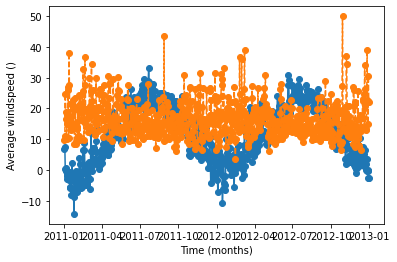

In [262]:
fig, ax = plt.subplots(sharey=True)
ax.plot(boston_weather['date'], boston_weather['tavg'],
        marker='o', linestyle=None)
ax.plot(boston_weather['date'], boston_weather['wspd'],
        marker='o', linestyle='--')
#ax.plot(flights_data['flight_date'], flights_data['cancelled'])
ax.set_xlabel('Time (months)')
ax.set_ylabel('Average windspeed ()')
plt.show()

In [ ]:
fig, ax = plt.subplots(sharey=True)
ax.plot(flights_data['flight_date'], flights_data['tavg'],
        marker='o', linestyle=None)
ax.plot(boston_weather['date'], boston_weather['wspd'],
        marker='o', linestyle='--')
#ax.plot(flights_data['flight_date'], flights_data['cancelled'])
ax.set_xlabel('Time (months)')
ax.set_ylabel('Average windspeed ()')
plt.show()

TypeError: cannot unpack non-iterable AxesSubplot object

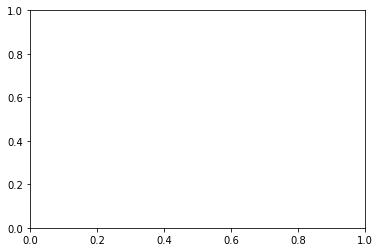

In [72]:
fig, ax = plt.subplot()
plt.show()

In [ ]:
ax.plot(weather_data['MONTH'],
        weather_data['MLY_TAVG-NORMAL'])

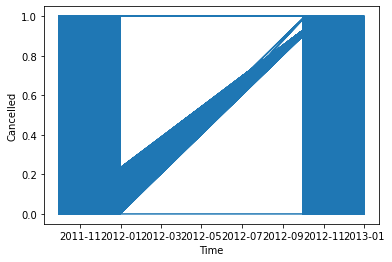

In [34]:
flights_data.groupby('flight_date')[['cancelled', 'diverted']].sum()

In [36]:
weather_data.columns

Index(['time', 'icao', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd',
       'pres', 'tsun'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

,time,icao,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,tsun
0,2011-10-01,KMIA,28.1,23.9,32.2,0.0,NaN,NaN,8.3,1010.3,702.0
1,2011-10-02,KMIA,26.9,23.9,30.6,0.0,NaN,49.3,13.0,1013.8,689.0
2,2011-10-03,KMIA,27.6,25.6,30.6,0.0,NaN,68.0,15.1,1016.9,685.0
3,2011-10-04,KMIA,27.1,25.6,30.0,0.0,NaN,57.1,15.1,1018.1,NaN
4,2011-10-05,KMIA,26.6,23.9,30.0,0.0,NaN,41.0,13.7,1017.0,681.0


In [49]:
sandy_year = weather_data["2020-10-01":"2020-12-31"]

TypeError: cannot do slice indexing on RangeIndex with these indexers [2020-10-01] of type str

TypeError: cannot do slice indexing on RangeIndex with these indexers [2020-10-01] of type str

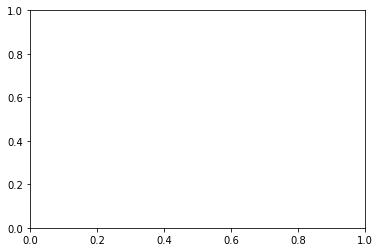

In [40]:
fig, ax = plt.subplots()
sandy_year = weather_data["2020-10-01":"2020-12-31"]



ax.plot(sandy_year.index, sandy_year['wspd'])
ax.set_xlabel('Time')
ax.set_ylabel('wspd')
plt.show()

In [ ]:
# SQL query to get flights data and airports data
flights_df = pd.read_sql_query(('''SELECT *
            FROM group4_flights_data f
                LEFT JOIN group4_weather w
                    ON f.origin = w.faa OR f.dest = w.ff
            '''), conn)
# foreign_key!!!